In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("../measurements/layer_2/tensor_jpeg/map.csv")
# df=pd.read_csv("../measurements/layer_8/tensor_regression/map.csv")

In [3]:
df["ratio"] = (128*26*26*4) / df["data_size_mean"] 
# df["ratio"] = (128*26*26*4) / (df["data_size_mean"] /8)

In [4]:
df.head()

,video_name,pruning_thresh,jepg_quality,data_size_mean,data_size_std,sparsity,decomposability,regularity,pictoriality,map,...,map_75,map_small,map_medium,map_large,mar_1,mar_100,mar_small,mar_medium,mar_large,ratio
0,b610204c-e3c8c65f,0.0,60,53722.10,2434.616498,0.000000e+00,-0.999219,0.360255,0.453249,0.012162,...,0.009901,0.011266,0.025495,-1.0,0.012198,0.012198,0.012037,0.025000,-1.0,6.442637
1,b610204c-e3c8c65f,0.0,70,67362.10,2418.470300,0.000000e+00,-0.999159,0.334665,0.434405,0.010166,...,0.010107,0.004231,0.023020,-1.0,0.009217,0.010371,0.005761,0.022222,-1.0,5.138082
2,b610204c-e3c8c65f,0.0,80,90625.15,2915.126005,0.000000e+00,-0.999609,0.328413,0.420830,0.016233,...,0.013170,0.004538,0.053193,-1.0,0.018698,0.018698,0.005236,0.055556,-1.0,3.819161
3,b610204c-e3c8c65f,0.0,90,145862.55,3026.946506,0.000000e+00,-0.999519,0.310938,0.420610,0.024199,...,0.017844,0.011314,0.062581,-1.0,0.025877,0.029825,0.014911,0.067331,-1.0,2.372864
4,b610204c-e3c8c65f,0.0,100,397068.35,5590.636603,7.223095e-08,-0.999219,0.337316,0.423298,0.019473,...,0.013050,0.010532,0.057704,-1.0,0.020118,0.026559,0.016330,0.075694,-1.0,0.871669


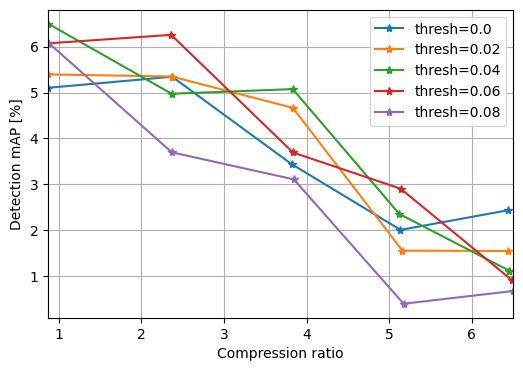

In [5]:
plt.figure(figsize=(6,4))
df_group = df.groupby("pruning_thresh")
for key in df_group.groups.keys():
    dfg = df_group.get_group(key)
    plt.plot(dfg["ratio"],dfg["map_50"]*100,"*-", label="thresh="+str(key))

plt.legend()
plt.xlabel("Compression ratio")
plt.ylabel("Detection mAP [%]")
plt.grid()
plt.autoscale(axis="x",tight=True)


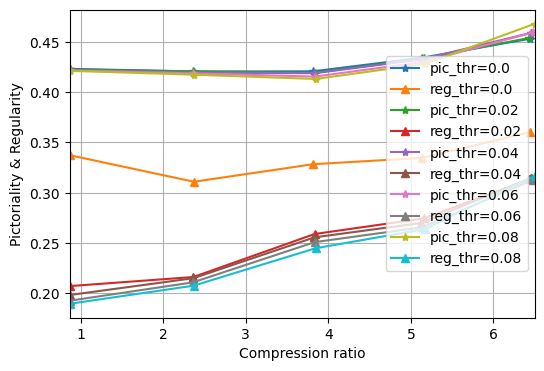

In [6]:
plt.figure(figsize=(6,4))
df_group = df.groupby("pruning_thresh")
for key in df_group.groups.keys():
    dfg = df_group.get_group(key)
    plt.plot(dfg["ratio"],dfg["pictoriality"],"*-", label="pic_thr="+str(key))
    plt.plot(dfg["ratio"],dfg["regularity"],"^-",label="reg_thr="+str(key))
    # plt.plot(dfg["ratio"],dfg["sparsity"],"D-",label="reg_thr="+str(key))
    # plt.plot(dfg["pictoriality"],dfg["map_50"]*100,"*", label="pic_thr="+str(key))

plt.legend(loc="right")
plt.xlabel("Compression ratio")
plt.ylabel("Pictoriality & Regularity")
plt.grid()
plt.autoscale(axis="x",tight=True)

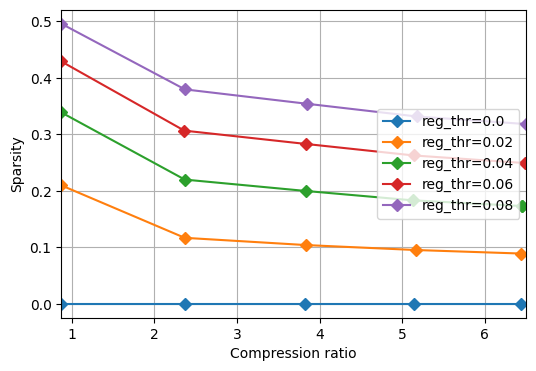

In [7]:
plt.figure(figsize=(6,4))
df_group = df.groupby("pruning_thresh")
for key in df_group.groups.keys():
    dfg = df_group.get_group(key)
    # plt.plot(dfg["ratio"],dfg["pictoriality"],"*-", label="pic_thr="+str(key))
    # plt.plot(dfg["ratio"],dfg["regularity"],"^-",label="reg_thr="+str(key))
    plt.plot(dfg["ratio"],dfg["sparsity"],"D-",label="reg_thr="+str(key))
    # plt.plot(dfg["pictoriality"],dfg["map_50"]*100,"*", label="pic_thr="+str(key))

plt.legend(loc="right")
plt.xlabel("Compression ratio")
plt.ylabel("Sparsity")
plt.grid()
plt.autoscale(axis="x",tight=True)

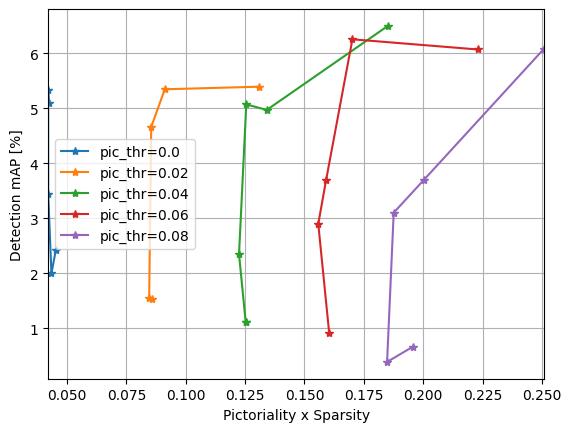

In [8]:
plt.figure()
df_group = df.groupby("pruning_thresh")
for key in df_group.groups.keys():
    dfg = df_group.get_group(key)
    # plt.plot(dfg["ratio"],dfg["pictoriality"],"*-", label="pic_thr="+str(key))
    # plt.plot(dfg["ratio"],dfg["regularity"],"^-",label="reg_thr="+str(key))
    plt.plot(dfg["pictoriality"]*(dfg["sparsity"]+0.1),dfg["map_50"]*100,"*-", label="pic_thr="+str(key))

plt.legend()
plt.xlabel("Pictoriality x Sparsity")
plt.ylabel("Detection mAP [%]")
plt.grid()
plt.autoscale(axis="x",tight=True)

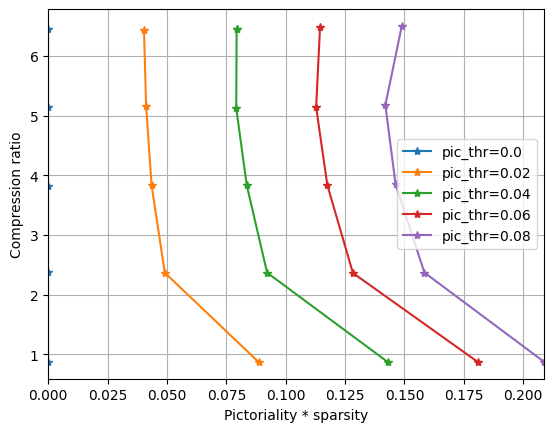

In [9]:
plt.figure()
df_group = df.groupby("pruning_thresh")
for key in df_group.groups.keys():
    dfg = df_group.get_group(key)
    # plt.plot(dfg["ratio"],dfg["pictoriality"],"*-", label="pic_thr="+str(key))
    # plt.plot(dfg["ratio"],dfg["regularity"],"^-",label="reg_thr="+str(key))
    plt.plot(dfg["pictoriality"]*dfg["sparsity"],dfg["ratio"],"*-", label="pic_thr="+str(key))

plt.legend()
plt.xlabel("Pictoriality * sparsity")
plt.ylabel("Compression ratio")
plt.grid()
plt.autoscale(axis="x",tight=True)